<a href="https://colab.research.google.com/github/ashwaq-nalshahrani/week3-ml-baseline-system/blob/main/cars_dis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pycaret plotly

import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Manual Modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# PyCaret
from pycaret.regression import*



import re
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score

RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=4, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')

import kagglehub
import os
path = kagglehub.dataset_download("abdulmalik1518/cars-datasets-2025")

csv_path = os.path.join(path, "Cars Datasets 2025.csv")

df = pd.read_csv(csv_path, encoding="latin1")
df.head()

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "abdulmalik1518/cars-datasets-2025",
    "Cars Datasets 2025.csv",            # 1. اسم الملف فقط (بدون مسارات)
    pandas_kwargs={"encoding": "latin-1"} # 2. الحل السحري لمشكلة الترميز
)

print(df.head())

  Company Names     Cars Names      Engines CC/Battery Capacity HorsePower  \
0       FERRARI  SF90 STRADALE           V8             3990 cc     963 hp   
1   ROLLS ROYCE        PHANTOM          V12             6749 cc     563 hp   
2          Ford            KA+  1.2L Petrol            1,200 cc   70-85 hp   
3      MERCEDES        GT 63 S           V8            3,982 cc     630 hp   
4          AUDI     AUDI R8 Gt          V10            5,204 cc     602 hp   

  Total Speed Performance(0 - 100 )KM/H      Cars Prices       Fuel Types  \
0    340 km/h                   2.5 sec      $1,100,000   plug in hyrbrid   
1    250 km/h                   5.3 sec        $460,000            Petrol   
2    165 km/h                  10.5 sec  $12,000-$15,000           Petrol   
3    250 km/h                   3.2 sec        $161,000            Petrol   
4    320 km/h                   3.6 sec        $253,290            Petrol   

  Seats        Torque  
0     2        800 Nm  
1     5        900 N

In [ ]:
df.describe().T

,count,unique,top,freq
Company Names,1218,37,Nissan,149
Cars Names,1218,1201,Macan T,2
Engines,1218,356,I4,64
CC/Battery Capacity,1215,311,"2,000 cc",31
HorsePower,1218,456,355 hp,23
Total Speed,1218,114,250 km/h,145
Performance(0 - 100 )KM/H,1212,180,6.5 sec,45
Cars Prices,1218,535,"$35,000",36
Fuel Types,1218,23,Petrol,871
Seats,1218,19,5,692


In [ ]:
df.shape

(1218, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [ ]:
df.columns

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque'],
      dtype='object')

In [ ]:
df.rename(
    columns={'CC/Battery Capacity':'battery_capacity',
    'Performance(0 - 100 )KM/H':'performance',
    'Cars Prices': 'prices'},
    inplace=True)
df.columns

Index(['Company Names', 'Cars Names', 'Engines', 'battery_capacity',
       'HorsePower', 'Total Speed', 'performance', 'prices', 'Fuel Types',
       'Seats', 'Torque'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['company_names', 'cars_names', 'engines', 'battery_capacity',
       'horsepower', 'total_speed', 'performance', 'prices', 'fuel_types',
       'seats', 'torque'],
      dtype='object')

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(1214, 11)

In [ ]:
df.drop('cars_names', inplace=True, axis=1)

In [ ]:
df.columns

Index(['company_names', 'engines', 'battery_capacity', 'horsepower',
       'total_speed', 'performance', 'prices', 'fuel_types', 'seats',
       'torque'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

company_names       0
engines             0
battery_capacity    3
horsepower          0
total_speed         0
performance         6
prices              0
fuel_types          0
seats               0
torque              1
dtype: int64


In [ ]:
df = df.dropna()
df.shape

(1206, 10)

In [ ]:
print(df.dtypes)

company_names       object
engines             object
battery_capacity    object
horsepower          object
total_speed         object
performance         object
prices              object
fuel_types          object
seats               object
torque              object
dtype: object


In [ ]:
print(df.dtypes)

company_names       object
engines             object
battery_capacity    object
horsepower          object
total_speed         object
performance         object
prices              object
fuel_types          object
seats               object
torque              object
dtype: object


In [ ]:
categorical_features = ['company_names', 'engines', 'fuel_types']
numerical_features = ['battery_capacity', 'horsepower', 'total_speed', 'performance', 'seats', 'torque']

In [ ]:
# Boxplots for numerical features
for col in numerical_features:
    fig = px.histogram(df, x=col,
                title=f"{col}",
                marginal="box",
                template="plotly_white",
                barmode="overlay", color_discrete_sequence=['#636EFA', '#EF553B'])
    fig.show()



In [ ]:
import re

def clean_currency_and_ranges_with_logic(val, col_name=None):

    if pd.isna(val):
        return np.nan

    s = str(val).lower()
    s = re.sub(r'[$,a-z/]', '', s)
    s = s.replace(' ', '')

    final_val = np.nan

    if '-' in s:
        try:
            parts = s.split('-')
            nums = [float(p.replace(',', '')) for p in parts if p.strip()]
            final_val = np.mean(nums)
        except:
            return np.nan
    else:
        try:
            final_val = float(s.replace(',', ''))
        except:
            return np.nan

    if col_name == "battery_capacity":
        if final_val > 20000:
            return np.nan

    elif col_name == "horsepower":
        if final_val > 2500:
            return np.nan

    elif col_name == "total_speed":
        if final_val > 600:
            return np.nan

    elif col_name == "performance":
        if final_val < 0.5 or final_val > 30:
            return np.nan

    elif col_name == "torque":
        if final_val > 4000:
            return np.nan


    elif col_name == "prices":
        if final_val > 1000000:
            return np.nan



    return final_val



numeric_cols_to_clean = [
    "battery_capacity",
    "horsepower",
    "total_speed",
    "performance",
    "prices",
    "torque"
]


for col in numeric_cols_to_clean:
    df[col] = df[col].apply(lambda x: clean_currency_and_ranges_with_logic(x, col_name=col))



In [ ]:
million_plus_count = (df['prices'] > 1000000).sum()

print(million_plus_count)

0


In [ ]:
df['seats'] = pd.to_numeric(df['seats'], errors='coerce')

In [ ]:
print(df.isna().sum())

company_names         0
engines               0
battery_capacity    107
horsepower           10
total_speed           0
performance           6
prices               25
fuel_types            0
seats                12
torque               17
dtype: int64


In [ ]:
# Boxplots for numerical features
for col in numerical_features:
    fig = px.histogram(df, x=col,
                title=f"{col} ",
                marginal="box",
                template="plotly_white",
                barmode="overlay", color_discrete_sequence=['#636EFA', '#EF553B'])
    fig.show()



In [ ]:
target = 'prices'

for col in numerical_features:
    if col == target:
        continue

    fig = px.scatter(df,
                    x=col,
                    y=target,
                    title=f"Relationship between {col} and {target}",
                    template="plotly_white",
                    color_discrete_sequence=['#636EFA'],
                    trendline="ols",
                    opacity=0.6)

    fig.show()

In [ ]:
df.columns

Index(['company_names', 'engines', 'battery_capacity', 'horsepower',
       'total_speed', 'performance', 'prices', 'fuel_types', 'seats',
       'torque'],
      dtype='object')

In [ ]:
X = df.drop(columns=['prices'])
y = df['prices']

y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [ ]:

categorical_features = ['company_names', 'engines', 'fuel_types']
numerical_features = ['battery_capacity', 'horsepower', 'total_speed', 'performance', 'seats', 'torque']

numeric_transformer = Pipeline(steps=[
    ('fill_missing', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('fill_missing', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
features_name = numerical_features + categorical_features

In [ ]:
valid_mask = y_train.notna()

y_train = y_train[valid_mask]
X_train = X_train.loc[valid_mask]

In [ ]:

# Initialize PyCaret setup

# session_id ensures reproducibility

s = setup(X_train, target =y_train, session_id = 123, verbose=False)

# Compare models to see which one performs best automatically

best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.1869,0.0757,0.2708,0.8850,0.0233,0.0176,0.0250
et,Extra Trees Regressor,0.1825,0.0816,0.2791,0.8779,0.0242,0.0173,0.0330
ridge,Ridge Regression,0.2050,0.0859,0.2897,0.8700,0.0247,0.0192,0.0100
br,Bayesian Ridge,0.2054,0.0861,0.2901,0.8696,0.0247,0.0192,0.0090
lr,Linear Regression,0.2060,0.0871,0.2918,0.8679,0.0248,0.0193,0.4580
ada,AdaBoost Regressor,0.2220,0.0988,0.3099,0.8511,0.0267,0.0209,0.0220
knn,K Neighbors Regressor,0.2129,0.1056,0.3161,0.8389,0.0265,0.0198,0.0090
rf,Random Forest Regressor,0.2048,0.1088,0.3234,0.8364,0.0277,0.0193,0.0460
huber,Huber Regressor,0.2562,0.1316,0.3554,0.8031,0.0298,0.0236,0.0120
en,Elastic Net,0.2554,0.1374,0.3641,0.7893,0.0300,0.0236,0.0100


In [ ]:
best_model

GradientBoostingRegressor(random_state=123)

In [ ]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2080,0.0792,0.2814,0.8918,0.0248,0.0199
1,0.1977,0.0701,0.2648,0.8958,0.0220,0.0180
2,0.2201,0.0871,0.2951,0.8520,0.0248,0.0205
3,0.2344,0.0998,0.3159,0.8362,0.0279,0.0225
4,0.2169,0.0986,0.3140,0.8227,0.0275,0.0205
5,0.2259,0.1289,0.3590,0.8316,0.0297,0.0211
6,0.2382,0.1202,0.3467,0.8140,0.0298,0.0225
7,0.1498,0.0437,0.2091,0.9382,0.0183,0.0142
8,0.1925,0.1112,0.3335,0.8492,0.0311,0.0192


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


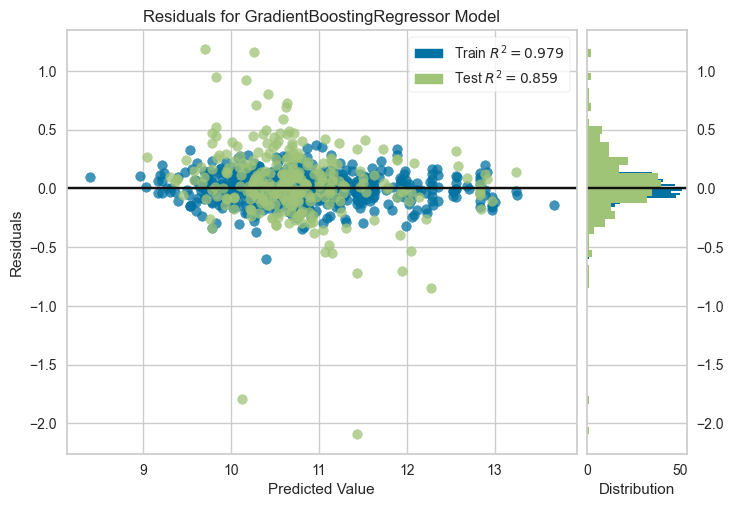

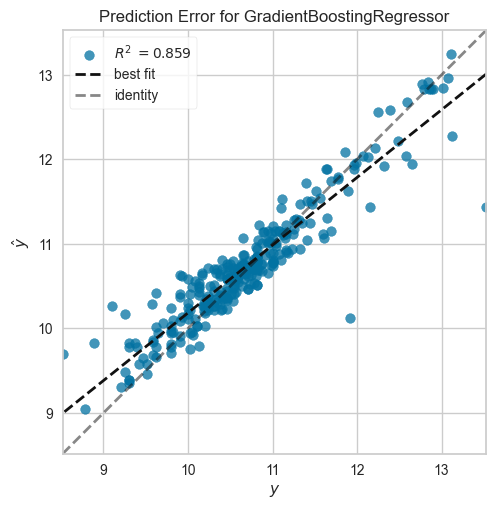

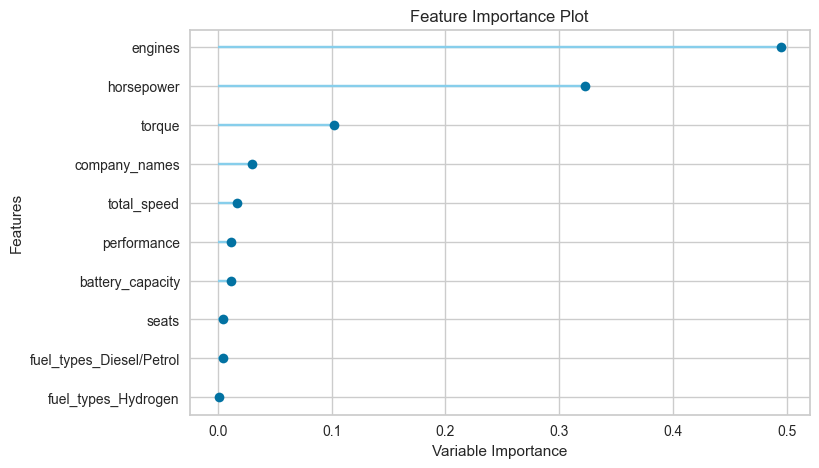

In [ ]:
plot_model(tuned_model, plot='residuals')
plot_model(tuned_model, plot='error')
plot_model(tuned_model, plot='feature')

In [ ]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.2027,0.0991,0.3148,0.8591,0.0269,0.0192


,company_names,engines,battery_capacity,horsepower,total_speed,performance,fuel_types,seats,torque,prices,prediction_label
46,LAMBORGHINI,V12,6498.0,740.0,350.0,2.8,Petrol,2.0,690.0,13.108267,13.246456
351,Volkswagen,2.0L Diesel I4,1968.0,167.0,220.0,8.0,Diesel,5.0,350.0,10.239996,10.384521
624,Porsche,4.2L Naturally Aspirated Flat-6,4194.0,515.0,296.0,3.1,Petrol,1.0,480.0,13.527830,11.432996
630,Tata Motors,1.2L Revotron Petrol / 1.5L Diesel,NaN,NaN,170.0,12.0,Petrol/Diesel,5.0,156.5,9.249658,10.171104
601,Cadillac,2.0L Turbo Inline-4 Gasoline,2000.0,237.0,240.0,6.6,Petrol,5.0,350.0,10.550486,10.580057
...,...,...,...,...,...,...,...,...,...,...,...
906,Jaguar Land Rover,I4 Petrol,NaN,160.0,215.0,9.0,Petrol,5.0,215.0,10.596660,10.606233
1183,Mazda,1.5L Inline-4,1500.0,85.0,145.0,14.0,Petrol,5.0,120.0,9.510519,9.581242
1173,Mazda,3.0L Inline-6,3000.0,250.0,210.0,7.5,Petrol,7.0,400.0,10.768506,10.732400
976,Peugeot,Electric Motor,50.0,136.0,150.0,8.1,Electric,5.0,260.0,10.463132,10.481834


from sklearn.metrics import r2_score
def ex_scale(y):
    return (np.exp(y) - 1)

y_pred = tuned_model.predict(X_test)


In [ ]:
print(df[numerical_features].corr())

                  battery_capacity  horsepower  total_speed  performance  \
battery_capacity          1.000000    0.548956     0.323063    -0.246499   
horsepower                0.548956    1.000000     0.745896    -0.696786   
total_speed               0.323063    0.745896     1.000000    -0.796826   
performance              -0.246499   -0.696786    -0.796826     1.000000   
seats                    -0.117758   -0.323793    -0.412667     0.195832   
torque                    0.707115    0.797725     0.432984    -0.423495   

                     seats    torque  
battery_capacity -0.117758  0.707115  
horsepower       -0.323793  0.797725  
total_speed      -0.412667  0.432984  
performance       0.195832 -0.423495  
seats             1.000000 -0.236066  
torque           -0.236066  1.000000  


In [ ]:
import numpy as np
import pandas as pd
from pycaret.regression import predict_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. دمج X_test و y_test مؤقتاً لتنظيف الصفوف الفارغة بشكل متزامن
# نستخدم copy() عشان ما نغير البيانات الأصلية بالغلط
test_data_full = X_test.copy()
test_data_full['actual_price_log'] = y_test  # نضيف عمود السعر (اللوغاريتم)

# 2. حذف أي صف لا يحتوي على سعر (NaN)
test_data_clean = test_data_full.dropna(subset=['actual_price_log'])

# 3. فصلهم مرة أخرى بعد التنظيف
X_test_clean = test_data_clean.drop(columns=['actual_price_log'])
y_test_log_clean = test_data_clean['actual_price_log']

# 4. التنبؤ باستخدام PyCaret على البيانات النظيفة
# الدالة سترجع داتا فريم فيها عمود 'prediction_label'
predictions_df = predict_model(tuned_model, data=X_test_clean)

# 5. استخراج التوقعات
pred_log_clean = predictions_df['prediction_label']

# 6. دالة فك اللوغاريتم (Ex-Scale)
def ex_scale(y):
    return np.expm1(y)

# 7. تحويل القيم إلى دولار (الحقيقة vs التوقع)
y_actual_dollar = ex_scale(y_test_log_clean)
y_pred_dollar = ex_scale(pred_log_clean)

# 8. حساب الأداء النهائي
mae = mean_absolute_error(y_actual_dollar, y_pred_dollar)
rmse = np.sqrt(mean_squared_error(y_actual_dollar, y_pred_dollar))
r2 = r2_score(y_actual_dollar, y_pred_dollar)

print("=" * 40)
print("🎯 Final Model Performance (Real USD Price):")
print("=" * 40)
print(f"💰 Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"📉 Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"📊 R² Score: {r2:.4f}")
print("=" * 40)

🎯 Final Model Performance (Real USD Price):
💰 Mean Absolute Error (MAE): $14,470.99
📉 Root Mean Squared Error (RMSE): $41,594.81
📊 R² Score: 0.8430
